In [114]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

# Import functions
from common.SubdomainsMesh import SubdomainsMesh

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
# Big
# Import data
fs = np.genfromtxt('../data/big/localF.dat')
Ks = np.genfromtxt('../data/big/localK.dat')

left_r = np.array([192, 188, 184, 471, 207, 202, 197, 412, 90, 91, 92])
right_r = np.array([268, 267, 266, 377, 28, 33, 38, 372, 15, 19, 23])
bottom_r = np.array([180, 179, 178, 455, 285, 290, 295, 500, 272, 276, 280])
top_r = np.array([104, 100, 96, 428, 119, 114, 109, 356, 9, 10, 11])

bounds_r = [left_r, right_r, bottom_r, top_r]

# Initial data
# Number of subdomains
Nsub_x = 3
Nsub_y = 3

qs_bottom_left = 460
qs_bottom_right = 489
qs_top_left = 417
qs_top_right = 361

qs = [qs_bottom_left, qs_bottom_right, qs_top_left, qs_top_right]

rs = np.setdiff1d(np.arange(len(fs)), qs)

m = SubdomainsMesh(Nsub_x, Nsub_y, Ks, fs, qs, rs, bounds_r)

m.set_A_global_local_matrices()
m.set_K_matrices()
m.set_B_matrices()
m.set_f_vectors()
m.set_d_vector()
m.set_uD_vector()

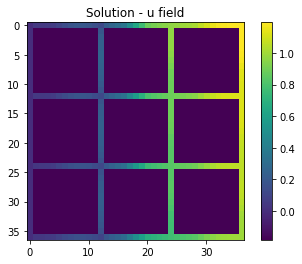

In [122]:
m.solve()
m.uP

m.plot_u_boundaries()

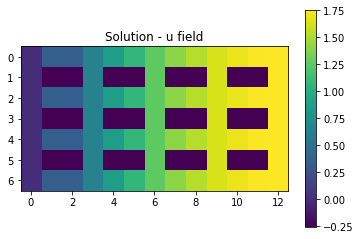

array([ 3.49206349e-01,  3.36843712e-01, -3.33066907e-16,  3.36843712e-01,
        3.49206349e-01,  6.30494505e-01,  3.49206349e-01,  3.36843712e-01,
        8.66605617e-01,  1.07493895e+00,  6.30494505e-01,  8.66605617e-01,
        1.07493895e+00,  1.25549451e+00,  8.66605617e-01,  1.07493895e+00,
        1.40827228e+00,  1.53327228e+00,  1.25549451e+00,  1.40827228e+00,
        1.53327228e+00,  1.63049451e+00,  1.40827228e+00,  1.53327228e+00,
        1.69993895e+00,  1.74160562e+00,  1.63049451e+00,  1.69993895e+00,
        1.74160562e+00,  1.75549451e+00,  1.69993895e+00,  1.74160562e+00,
        3.49206349e-01,  3.36843712e-01,  0.00000000e+00,  3.36843712e-01,
        3.49206349e-01,  6.30494505e-01,  3.49206349e-01,  3.36843712e-01,
        8.66605617e-01,  1.07493895e+00,  6.30494505e-01,  8.66605617e-01,
        1.07493895e+00,  1.25549451e+00,  8.66605617e-01,  1.07493895e+00,
        1.40827228e+00,  1.53327228e+00,  1.25549451e+00,  1.40827228e+00,
        1.53327228e+00,  

In [123]:
# SMALL
# Import data
fs = np.genfromtxt('../data/big/localF_small.dat')
Ks = np.genfromtxt('../data/big/localK_small.dat')

left_r = np.array([4])
right_r = np.array([7])
bottom_r = np.array([1, 2])
top_r = np.array([9, 10])

bounds_r = [left_r, right_r, bottom_r, top_r]

# Initial data
# Number of subdomains
Nsub_x = 4
Nsub_y = 3

qs_bottom_left = 0
qs_bottom_right = 3
qs_top_left = 8
qs_top_right = 11

qs = [qs_bottom_left, qs_bottom_right, qs_top_left, qs_top_right]

rs = np.setdiff1d(np.arange(len(fs)), qs)

m1 = SubdomainsMesh(Nsub_x, Nsub_y, Ks, fs, qs, rs, bounds_r)

m1.set_A_global_local_matrices()
m1.set_K_matrices()
m1.set_B_matrices()
m1.set_f_vectors()
m1.set_d_vector()
m1.set_uD_vector()
m1.solve()

m1.plot_u_boundaries()


In [117]:
print(m1.Ks / 0.02777777777777777)

[[ 26. -14.   0.   0.   1. -13.   0.   0.   0.   0.   0.   0.]
 [-14.  52. -14.   0. -13.   2. -13.   0.   0.   0.   0.   0.]
 [  0. -14.  52. -14.   0. -13.   2. -13.   0.   0.   0.   0.]
 [  0.   0. -14.  26.   0.   0. -13.   1.   0.   0.   0.   0.]
 [  1. -13.   0.   0.  52. -28.   0.   0.   1. -13.   0.   0.]
 [-13.   2. -13.   0. -28. 104. -28.   0. -13.   2. -13.   0.]
 [  0. -13.   2. -13.   0. -28. 104. -28.   0. -13.   2. -13.]
 [  0.   0. -13.   1.   0.   0. -28.  52.   0.   0. -13.   1.]
 [  0.   0.   0.   0.   1. -13.   0.   0.  26. -14.   0.   0.]
 [  0.   0.   0.   0. -13.   2. -13.   0. -14.  52. -14.   0.]
 [  0.   0.   0.   0.   0. -13.   2. -13.   0. -14.  52. -14.]
 [  0.   0.   0.   0.   0.   0. -13.   1.   0.   0. -14.  26.]]


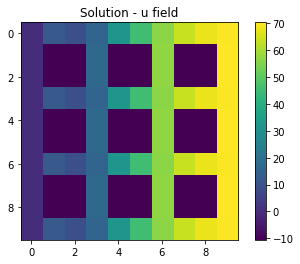

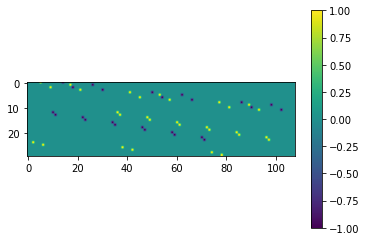

In [118]:
from common.HeatTransferProblem import HeatTransferProblem
from common.utils import plot_sparse_matrix

nx = 4
ny = 4
Nsub_x, Nsub_y = [3,3]

p = HeatTransferProblem(nx, ny)
m2 = SubdomainsMesh.from_problem(Nsub_x, Nsub_y, p)

m2.set_A_global_local_matrices()
m2.set_K_matrices()
m2.set_B_matrices()
m2.set_f_vectors()
m2.set_d_vector()
m2.set_uD_vector()
m2.solve()
m2.uP

m2.plot_u_boundaries()

plot_sparse_matrix(m2.BlambdaR)

a = m2.BlambdaR

In [119]:
def plot_displacements(u, n):
    # Create a meshgrid for the nodes
    x = np.linspace(0, 1, n)
    X, Y = np.meshgrid(x, x)

    # Reshape the displacements to match the meshgrid shape
    u_mesh = u.reshape((n, n))

    # Create the plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, u_mesh, cmap='coolwarm')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Displacement')

    # Show the plot
    plt.show()

In [120]:
nx = 50
ny = 50

p1 = HeatTransferProblem(nx, ny)
#plot_sparse_matrix(p1.generate_stiffness_matrix())
K = p1.generate_stiffness_matrix()
f = p1.generate_load_vector()

K = modify_diagonal(K)

indices = np.r_[np.concatenate((np.arange(0, 4), np.arange(7, 11), np.arange(13, 17), np.arange(19, 23)))]
Ks = K[indices[:, None], indices]

plot_sparse_matrix(Ks)

uD = np.zeros(nx)
nodesD = np.arange(0, nx*ny ,nx)

K[nodesD, :] = 0 
K[nodesD, nodesD] = 1
f[nodesD] = uD

print(f)

u = np.linalg.solve(K, f)
u_mesh = u.reshape((nx, ny))

plot_sparse_matrix(u_mesh)
print(u_mesh)


NameError: name 'modify_diagonal' is not defined

In [ ]:
nx = 6
ny = 6

Nsub_x = 2
Nsub_y = 2

p2 = HeatTransferProblem(nx, ny)
mt = SubdomainsMesh.from_problem(Nsub_x, Nsub_y, p2)

mt.build_and_solve()
mt.uR[np.abs(mt.uR - 4.45710374) <0.001]

array([], dtype=float64)

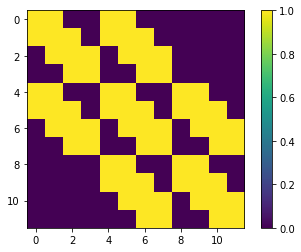

In [ ]:
Ks[Ks != 0] = 1
plot_sparse_matrix(Ks)

In [ ]:
def create_subdomain_matrices(K, f, num_subdomains):
    N = int(np.sqrt(K.shape[0]))  # Size of the original mesh
    subdomain_size = int(N // np.sqrt(num_subdomains))  # Size of each subdomain

    Ks = []  # List to store subdomain stiffness matrices
    fs = []  # List to store subdomain source vectors

    for subdomain_index in range(1, num_subdomains+1):
        subdomain_rows = range((subdomain_index-1)*subdomain_size, subdomain_index*subdomain_size)
        subdomain_cols = range((subdomain_index-1)*subdomain_size, subdomain_index*subdomain_size)

        K_subdomain = K[np.ix_(subdomain_rows, subdomain_cols)]
        f_subdomain = f[subdomain_rows]

        Ks.append(K_subdomain)
        fs.append(f_subdomain)

    return Ks, fs

create_subdomain_matrices(K, f, 4)

([array([[ 1.,  0.,  0.,  0.,  0.],
         [-1.,  4., -1.,  0.,  0.],
         [ 0., -1.,  4., -1.,  0.],
         [ 0.,  0., -1.,  4., -1.],
         [ 0.,  0.,  0., -1.,  4.]]),
  array([[ 4., -1.,  0.,  0.,  0.],
         [-1.,  4., -1.,  0.,  0.],
         [ 0., -1.,  4., -1.,  0.],
         [ 0.,  0., -1.,  4., -1.],
         [ 0.,  0.,  0., -1.,  4.]]),
  array([[ 4.,  0.,  0.,  0.,  0.],
         [ 0.,  1.,  0.,  0.,  0.],
         [ 0., -1.,  4., -1.,  0.],
         [ 0.,  0., -1.,  4., -1.],
         [ 0.,  0.,  0., -1.,  4.]]),
  array([[ 4., -1.,  0.,  0.,  0.],
         [-1.,  4., -1.,  0.,  0.],
         [ 0., -1.,  4., -1.,  0.],
         [ 0.,  0., -1.,  4., -1.],
         [ 0.,  0.,  0., -1.,  4.]])],
 [array([0., 2., 2., 2., 2.]),
  array([2., 2., 2., 2., 2.]),
  array([1., 0., 4., 4., 4.]),
  array([4., 4., 4., 4., 4.])])